# Distribuição discreta
## Função de Poisson

A distribuição de Poisson expressa as probabilidades que uma série de eventos ocorram em um dado tempo, se os eventos são indepêndentes um do outro. A distribuição é dada por:

$P(X = i) = \frac{\lambda^{i}}{i}e^{-\lambda}$, para $i = 0,1,2...$

Onde $\lambda$ é o parâmetro ($\lambda = np$, n = número de repetições muito grande e p = probabilidade de observar/acontecer o evento único muito pequena) e $i$ (variável aleatória) é a quantidade de vezes que o evento é observado/acontece no intervalo de tempo.

Obs.: i tem a unidade do parâmetro. 

Ex.: O processo $\theta$ emite a particula $\phi$ a uma taxa média de 3/min. Qual a probabilidade de ocorrer acima de 2/min?

$P(X > 2) = P(X = 3) + P(X = 4) + P(X = 5)...$ a definição é com igualdade P(X = i)

$P(X > 2) = 1 - P(X \leq 2) = 1 - $(evento complementa/indesejado)

$P(X > 2) = 1 - [P(X = 0) + P(X = 1) + P(X = 2)] = $ probabilidade/valor

E se X[0,n]?

In [74]:
from scipy.stats import poisson
import numpy as np

def dist_poisson(param,i):
    poisson_r = []
    for n in i:
        u = (np.exp(-param)*param**n)/np.math.factorial(n)
        poisson_r.append(u)
    return poisson_r
    

lambida=15
x_d = np.linspace(0,40,41)
#x_d = np.arange(0,40,1)
print(x_d)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40.]


Text(0.5, 0, '$i$')

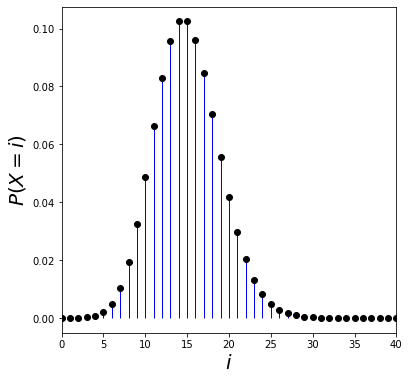

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

poisson_r2 = dist_poisson(lambida,x_d) #distribuição usando a função manual

poisson_r = poisson.pmf(x_d,lambida)  #distribuição usando a função pela biblioteca Scipy

#r = poisson.rvs(lambida, size=1000)

plt.figure(figsize=(6, 6))
#plt.hist(r, density=True, histtype='stepfilled', alpha=0.4)
plt.plot(x_d,poisson_r,'o', color='black')
plt.vlines(x_d, 0, poisson_r, colors='b', linestyles='-', lw=1)
plt.xlim([0,40])
plt.ylabel('$P(X = i)$',fontsize=20)
plt.xlabel('$i$',fontsize=20)

# Distribuição contínua
## Função Gaussiana ou normal

A distribuição gaussiana expressa o comportamento de muitos fenômenos da natureza. 

Uma variavel aleatória $X \approx N(\mu,\sigma^2)$ é dita gaussiana se a função de densidade de probabilidade for dada por:

$f(x;\mu,\sigma^2) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$, sendo $-\infty < x < \infty$ e $\sigma >0$.

Onde $\mu$ é a média e $\sigma^2$ é a variância. Ambos são parâmetros da função.

Na distribuição normal a maior probabilidade ocorre no valor médio. Quanto menor for a variância mais próximos da média são os valores da amostra e portanto, mais delgada é a curva.

Obs1.: Na dist. normal média = mediana = moda. Distribuição simétrica (direita e esqueda da média iguais)

68% dos valor dentro de $1\sigma$, 95% dentro de $2\sigma$ e 99,7% dentro de $3\sigma$.


Obs2.: Para obter a probabilidade em um intervalo [z1,z2] utiliza-se uma dist. normal padrão. Para transformar uma distribuição normal em uma distribuição normal padrão:

$\mu=0$ (média) e $\sigma=1$ (desvio padrão). $Z=(x-\mu)/\sigma$ (Variavel reduzida)

$f(x;0,1) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$

Ex.:

In [67]:
from scipy.stats import poisson
import numpy as np

def dist_gaussiana(mu,sigma,x):
    arg = ((x-mu)**2)/(2*(sigma)**2)
    gaussian = 1/(np.exp(arg)*(sigma*np.sqrt(2*np.pi)))
    return gaussian

media = 20 
d_std = 10  
x_c = np.linspace(0,40,1000)

s_std = np.std(x_c)

Text(0.5, 0, '$x$')

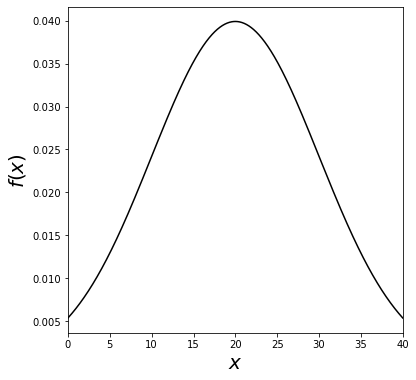

In [68]:
gaussian = dist_gaussiana(media,d_std,x_c)
#gaussian2 = dist_gaussiana(media,s_std,x_c)

plt.figure(figsize=(6, 6))
plt.plot(x_c,gaussian,color='black')
plt.xlim([0,40])
plt.ylabel('$f(x)$',fontsize=20)
plt.xlabel('$x$',fontsize=20)

(array([ 1.,  0.,  2.,  4.,  1.,  7.,  2.,  8., 13., 13., 16., 20., 29.,
        41., 27., 39., 48., 54., 63., 64., 68., 69., 58., 57., 57., 41.,
        47., 38., 31., 22., 16., 16.,  8.,  5.,  7.,  4.,  0.,  2.,  1.,
         1.]),
 array([-12.10368789, -10.5512067 ,  -8.99872552,  -7.44624433,
         -5.89376314,  -4.34128196,  -2.78880077,  -1.23631959,
          0.3161616 ,   1.86864278,   3.42112397,   4.97360516,
          6.52608634,   8.07856753,   9.63104871,  11.1835299 ,
         12.73601108,  14.28849227,  15.84097346,  17.39345464,
         18.94593583,  20.49841701,  22.0508982 ,  23.60337938,
         25.15586057,  26.70834176,  28.26082294,  29.81330413,
         31.36578531,  32.9182665 ,  34.47074768,  36.02322887,
         37.57571006,  39.12819124,  40.68067243,  42.23315361,
         43.7856348 ,  45.33811599,  46.89059717,  48.44307836,
         49.99555954]),
 <a list of 40 Patch objects>)

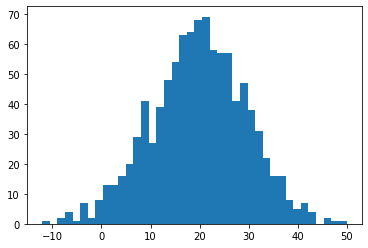

In [25]:
from random import gauss
f_gauss = [gauss(media,d_std) for i in range(0,1000)]

plt.hist(f_gauss,bins=40)

In [177]:
#saida de dados
import pandas as pd

dados_p = np.column_stack( (poisson_r.reshape(-1,1),x_d.reshape(-1,1)) )

dados_g = np.column_stack( (gaussian.reshape(-1,1),x_c.reshape(-1,1)) )


poisson_df = pd.DataFrame(data=dados_p, columns = ['pdf_Poisson','var_aleatória'])
poisson_df['parâmetro'] = pd.Series(lambida)
poisson_df.to_csv("/home/Jacks/Documentos/python/poisson.csv",index=False,encoding = 'UTF-8',sep=";")

gaussian_df = pd.DataFrame(data=dados_g, columns = ['pdf_Gaussian','var_aleatória'])
gaussian_df['média'] , gaussian_df['desvio'] = pd.Series(media) , pd.Series(d_std)
gaussian_df.to_csv("/home/Jacks/Documentos/python/gaussiano.csv",index=False,encoding = 'UTF-8',sep=";")
  

In [182]:
CSV = pd.read_csv("/home/Jacks/Documentos/python/poisson.csv",encoding = 'UTF-8',sep=";")
CSV.head(len(CSV))

,pdf_Poisson,var_aleatória,parâmetro
0,3.059023e-07,0.0,15.0
1,4.588535e-06,1.0,NaN
2,3.441401e-05,2.0,NaN
3,1.720701e-04,3.0,NaN
4,6.452627e-04,4.0,NaN
5,1.935788e-03,5.0,NaN
6,4.839470e-03,6.0,NaN
7,1.037029e-02,7.0,NaN
8,1.944430e-02,8.0,NaN
9,3.240717e-02,9.0,NaN


In [181]:
CSV2 = pd.read_csv("/home/Jacks/Documentos/python/gaussiano.csv",encoding = 'UTF-8',sep=";")
CSV2.head(len(CSV2))

,pdf_Gaussian,var_aleatória,média,desvio
0,0.005399,0.00000,20.0,10.0
1,0.005442,0.04004,NaN,NaN
2,0.005486,0.08008,NaN,NaN
3,0.005530,0.12012,NaN,NaN
4,0.005574,0.16016,NaN,NaN
...,...,...,...,...
995,0.005574,39.83984,NaN,NaN
996,0.005530,39.87988,NaN,NaN
997,0.005486,39.91992,NaN,NaN
998,0.005442,39.95996,NaN,NaN
